# Linear regression via gradient descent: function edition

We want to find the vector $\theta$ that minimizes the loss/cost function $J(\theta) = \frac{1}{2} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2$, where $h_\theta(x^{(i)}) = \theta^T X_i$.

Gradient descent begins with $\theta_{0}$, some initial value(s) for elements $j=0, ..., n$, then updates $\theta$ iteratively such that $\theta_j := \theta_j - \alpha \dfrac{\partial J(\theta)}{\partial \theta_j}$, where $\alpha$ is a learning rate or step size parameter. In this way, we are taking first order steps along the gradient towards (hopefully) the region with lower $J(\theta)$.

The partial derivative of the cost function with respect to parameter $\theta_j$ is $\dfrac{\partial J(\theta)}{\partial \theta_j} = \sum_{i=1}^{m} \big(h_\theta (x^{(i)}) - y^{(i)}\big) x_j^{(i)}$, which means that the update rule can be written as $\theta_j := \theta_j - \alpha \sum_{i=1}^{m} \big(h_\theta (x^{(i)}) - y^{(i)}\big) x_j^{(i)}$.

In this implementation I'll try to avoid global variables and use functions instead.

In [195]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def sim_reg(N, n, sigma):
    intercept = np.repeat(1, N)
    if n > 1:
        x = np.random.rand(N, n - 1)
        X = np.column_stack((intercept, x))
    else:
        X = intercept
    beta = np.random.normal(0, 1, n)
    mu_y = np.dot(X, beta)
    y = np.random.normal(mu_y, sigma, N)
    return {'beta':beta, 'y':y, 'X':X, 'n':n, 'N':N}

out = sim_reg(1000, 5, 1)

print out['beta']

[ 0.099808   -1.03313903 -1.96428601 -0.38138426 -0.85937288]


Now, we can initialize the parameters at some random, dispersed values, choose the learning rate, and iteratively update our parameter vector using gradient descent. Again, the update rule is $\theta_j := \theta_j - \alpha \sum_{i=1}^{m} \big(h_\theta (x^{(i)}) - y^{(i)}\big) x_j^{(i)}$.

In [196]:
def linreg_grd(y, X, alpha, iters):
    n = np.shape(X)[1]
    N = np.shape(X)[0]
    theta = np.random.normal(0, 1, n)
    theta_out = np.empty([iters, n])
    val = np.empty(N)
    for it in range(0, iters):
        theta_out[it, ] = theta
        for j in range(0, n):
            for i in range(0, N):
                val[i] = (np.dot(np.transpose(theta_out[it, ]), X[i, ]) - y[i]) * X[i, j]
            theta[j] = theta[j] - alpha * sum(val)
    return {'theta_out':theta_out, 'iters':iters}

# estimate parameters
res = linreg_grd(out['y'], out['X'], .0009, 100)

Last, plot the results to evaluate convergence and parameter recovery.

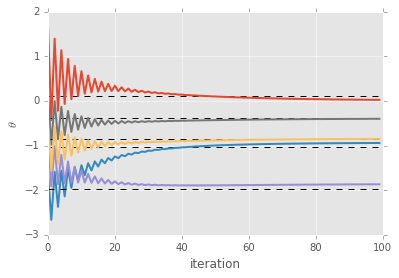

In [197]:
for i in range(0, out['n']):
    plt.axhline(out['beta'][i], linestyle = 'dashed', color='black')
    plt.plot(range(0, res['iters']), res['theta_out'][:, i], lw=2)
    plt.xlabel('iteration')
    plt.ylabel(r'$\theta$')